<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/think-stats/04_modeling_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import numpy as np
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/analytic.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/populations.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/babyboom.dat")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/PEP_2012_PEPANNRES_with_ann.csv")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded analytic.py
Downloaded first.py
Downloaded brfss.py
Downloaded populations.py
Downloaded hinc.py
Downloaded babyboom.dat
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz
Downloaded CDBRFS08.ASC.gz
Downloaded PEP_2012_PEPANNRES_with_ann.csv
Downloaded hinc06.csv


In [6]:
from collections import Counter

import numpy as np
import pandas as pd

import nsfg
import first
import thinkstats2
import thinkplot

import analytic

##Exponential distribution

Here's what the exponential CDF looks like with a range of parameters.

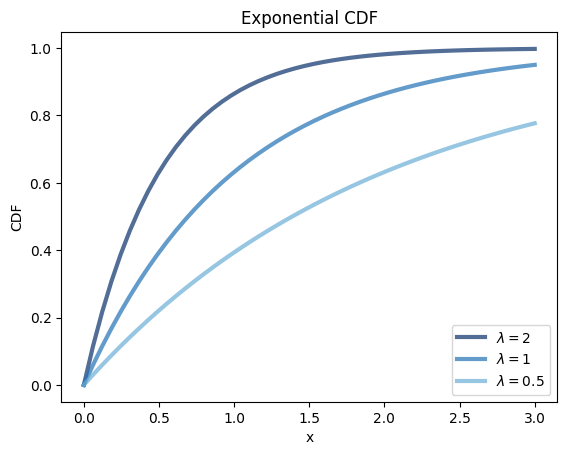

In [5]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
  xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
  label = r"$\lambda=%g$" % lam
  thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Exponential CDF", xlabel="x", ylabel="CDF", loc="lower right")

Here's the distribution of interarrival times from a dataset of birth times.

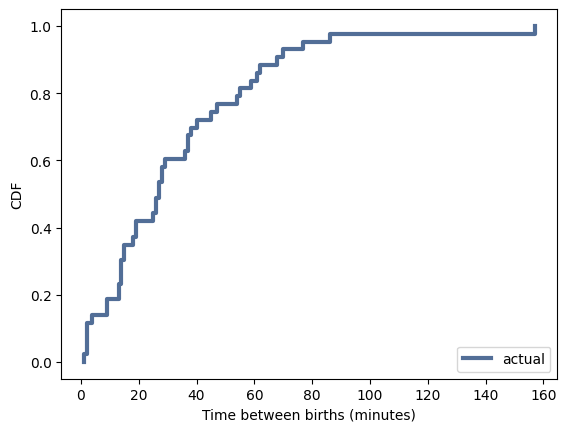

In [7]:
df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()       # difference between consecutive birth times
cdf = thinkstats2.Cdf(diffs, label="actual") # distribution of these interarrival times

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CDF")

Here's what the CCDF looks like on a log-y scale. A straight line is consistent with an exponential distribution.

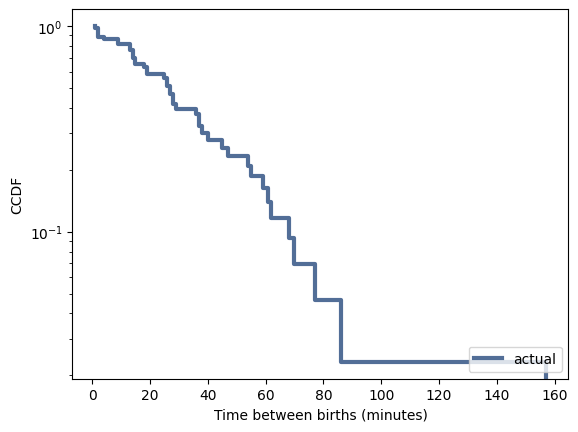

In [8]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CCDF", yscale="log", loc="lower right")

It is not exactly straight, which indicates that the
exponential distribution is not a perfect model for this data. Most likely the underlying
assumption—that a birth is equally likely at any time of day—is not exactly true.

Nevertheless, it might be reasonable to model this dataset with an exponential distribution.

In this example, 44 babies are born in 24 hours, so the rate
is `λ = 0.0306` births per minute. The mean of an exponential distribution is `1 / λ`, so the
mean time between births is 32.7 minutes.

##Normal Distribution

Percentile Rank computes the fraction of scores less than or equal to `your_score`.

In [ ]:
def percentile_rank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [ ]:
# If this is the list of scores.
t = [55, 66, 77, 88, 99]

In [ ]:
# If you got the 88, your percentile rank is 80.
percentile_rank(t, 88)

80.0

In [ ]:
def percentile(scores, p_rank):
    scores.sort()
    for score in scores:
        if percentile_rank(scores, score) >= p_rank:
            return score

In [ ]:
# The median is the 50th percentile, which is 77.
percentile(t, 50)

77

Here's a more efficient way to compute percentiles.

In [ ]:
def percentile2(scores, p_rank):
    scores.sort()
    index = p_rank * (len(scores)-1) // 100
    return scores[int(index)]

In [ ]:
# Let's hope we get the same answer.
percentile2(t, 50)

77

##CDF

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`. The only difference is that the result is `0-1` instead of `0-100`.

In [ ]:
def eval_cdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

In [ ]:
t = [1, 2, 2, 3, 5]

In [ ]:
# We can evaluate the CDF for various values
eval_cdf(t, 0), eval_cdf(t, 1), eval_cdf(t, 2), eval_cdf(t, 3), eval_cdf(t, 4), eval_cdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

Here's an example using real data, the distribution of pregnancy length for live births.

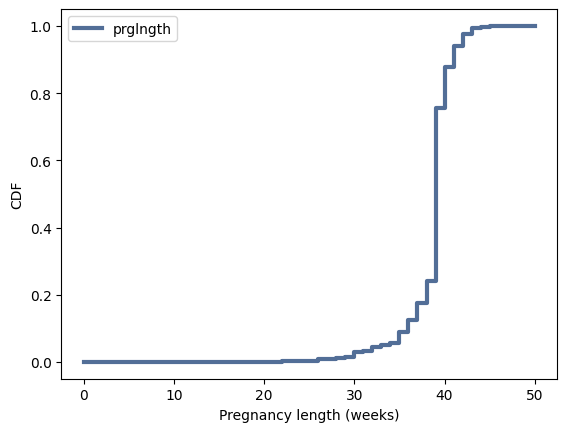

In [ ]:
cdf = thinkstats2.Cdf(live.prglngth, label="prglngth")
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="CDF", loc="upper left")

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.

For example, 94% of pregnancy lengths are less than or equal to 41.

In [ ]:
cdf.Prob(41)

0.9406427634455619

In [ ]:
cdf.Prob(40)

0.8764757324005247

In [ ]:
cdf.Prob(39)

0.7544818539571491

In [ ]:
cdf.Prob(38)

0.2414735461303017

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.

For example, the median is the value that corresponds to 0.5.

In [ ]:
cdf.Value(0.94)

41

In [ ]:
cdf.Value(0.87)

40

In [ ]:
cdf.Value(0.75)

39

In [ ]:
cdf.Value(0.24)

38

##Comparing CDFs

In general, CDFs are a good way to visualize distributions. They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

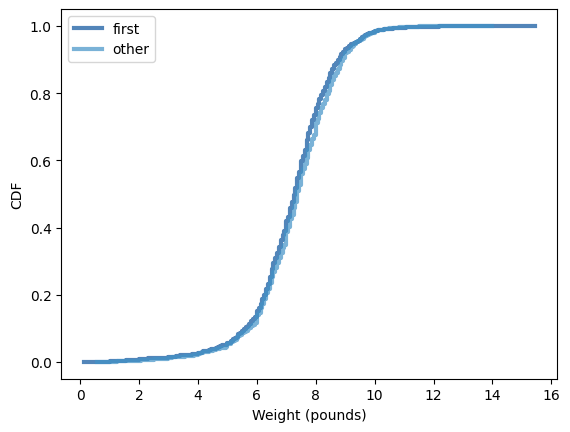

In [ ]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label="first")
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label="other")

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel="Weight (pounds)", ylabel="CDF")

##Percentile-Based Statistics

In [ ]:
# We can use the CDF of birth weight to compute percentile-based statistics.
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label="live")

In [ ]:
# Again, the median is the 50th percentile.
median = live_cdf.Percentile(50)
median

7.375

In [ ]:
# The interquartile range is the interval from the 25th to 75th percentile.
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

We can use the CDF to look up the percentile rank of a particular value.

For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [ ]:
live_cdf.PercentileRank(10.2)

98.82717415357381

##Random Numbers

If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [ ]:
sample = np.random.choice(weights, 100, replace=True)
rank = [live_cdf.PercentileRank(x) for x in sample]

The resulting list of ranks should be approximately uniform from 0-1.

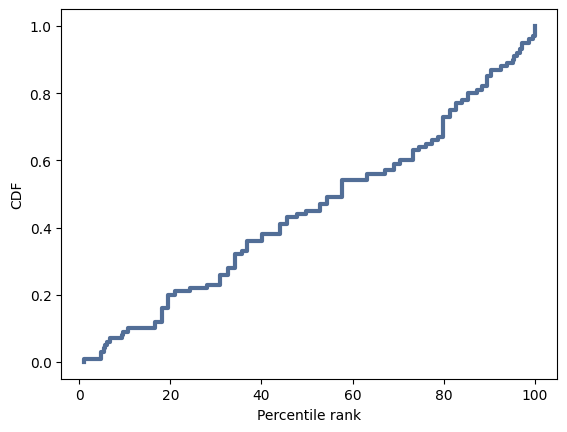

In [ ]:
rank_cdf = thinkstats2.Cdf(rank)

thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel="Percentile rank", ylabel="CDF")

The CDF is approximately a straight line, which means that
the distribution is uniform.

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf. Here's an example.

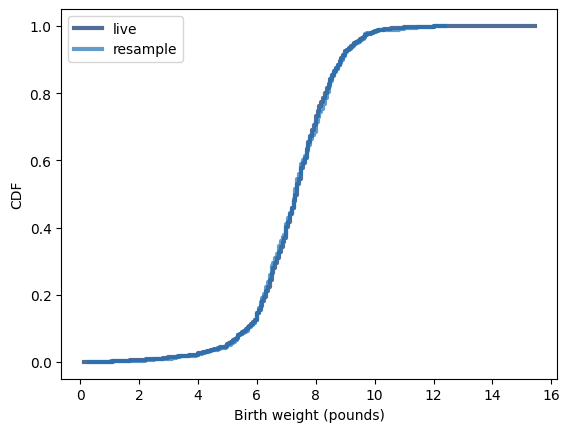

In [ ]:
resample = live_cdf.Sample(1000)

thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label="resample"))
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="CDF")

This confirms that the random sample has the same distribution as the original data.

##Exercises